<a href="https://colab.research.google.com/github/uliang/MS9002-Data-mining-techniques/blob/master/Illustration_of_OLS_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
from scipy.stats import norm
from collections import namedtuple

In [0]:
#@title Model Parameters 
e = 0.69 #@param {type:"slider", min:0.1, max:1, step:0.01}
_intercept = 0.9 #@param {type:"slider", min:-5, max:5, step:0.1}
_gradient = -0.3 #@param {type:"slider", min:-0.5, max:10, step: 0.05}

Params = namedtuple('params', ['a', 'b'])
parameters = Params(a=_intercept, b=_gradient) 


In [0]:

normal_dist = norm(scale=e)
x = np.linspace(-1, 3, 20) 
y = parameters.a + parameters.b*x + normal_dist.rvs(size=20)


In [0]:
#@title Choose intercept and gradient {display-mode: "form"}
intercept = 0.9 #@param {type:"slider", min:-2, max:3, step:0.02}
gradient = -0.05 #@param {type: "slider", min: -0.5, max:10, step: 0.05}
show_OLS_estimate = True #@param {type:"boolean"}
show_residual_bars = True #@param {type:"boolean"}
show_true_model = True #@param {type: "boolean"}
show_candidate_equation = True #@param {type: "boolean"}

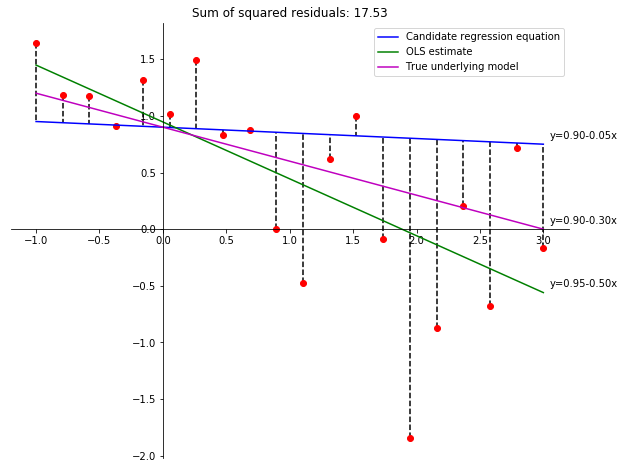

In [78]:
%matplotlib inline 

import matplotlib.pyplot as plt

# Figure declarations
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Computing points to visualize candidate equation and Sum of Squares Residuals
xx = np.linspace(-1, 3, 100)
yy = intercept + gradient * xx

ssr = np.sum(np.power(y - (intercept + gradient * x), 2))

# Compute true regression model 
y_model = parameters.a + parameters.b * xx

# Compute OLS estimate Let X = design matrix, then beta = (X^T*X)^-1*X^T*y

X = np.c_[np.ones_like(x), x]
beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)
a, b = beta
y_ols = a + b * xx

# Plot objects 
ax.plot(x,y, 'ro')

get_sign = lambda x: '-' if np.sign(x) == -1 else '+'
get_equation = lambda a,b : f'y={a:.2f}{get_sign(b)}{np.abs(b):.2f}x'

if show_candidate_equation:
  ax.plot(xx, yy, 'b-', label='Candidate regression equation')
  ax.text(xx[-1]+0.05, yy[-1]+0.05, get_equation(intercept, gradient))
 
if show_OLS_estimate: 
  ax.plot(xx, y_ols, 'g-', label="OLS estimate")
  ax.text(xx[-1]+0.05, y_ols[-1]+0.05, get_equation(a, b))

if show_true_model: 
  ax.plot(xx, y_model, 'm-', label='True underlying model')
  ax.text(xx[-1]+0.05, y_model[-1]+0.05, get_equation(parameters.a, parameters.b))

# Display residual bars
y_fit = intercept + gradient * x
if show_residual_bars: 
  ax.vlines(x, y, y_fit, colors='k', linestyles='dashed')

# Title matter
ax.set_title(f'Sum of squared residuals: {ssr:.2f}')

ax.legend(loc='best')